In [138]:
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
import seaborn as sns

Preparem les dades de train per analitzar-les.

In [139]:
hi_data = pd.read_csv("train.csv")
hi_data_no_modified = pd.read_csv("train.csv")

Mirem la quantitat d'atributs i examinem els tipus.

In [140]:
print (hi_data.dtypes)
hi_data.head()

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [141]:
categorias = hi_data['Response'].unique()
print("Categories:", categorias)
print(hi_data['Response'].value_counts())

Categories: [1 0]
Response
0    334399
1     46710
Name: count, dtype: int64


Visualitzem el nombre de Nans.

In [142]:
print(hi_data.isna().sum())
print()
print("Per lo tant, total de NaNs: ", hi_data.isna().sum().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Per lo tant, total de NaNs:  0


En veure que no tenim NaNs podem passar a analitzar la correlació.

Correlación entre cada atributo y la variable objetivo (Response):
id                     -0.001368
Age                     0.111147
Driving_License         0.010155
Region_Code             0.010570
Previously_Insured     -0.341170
Annual_Premium          0.022575
Policy_Sales_Channel   -0.139042
Vintage                -0.001050
Name: Response, dtype: float64


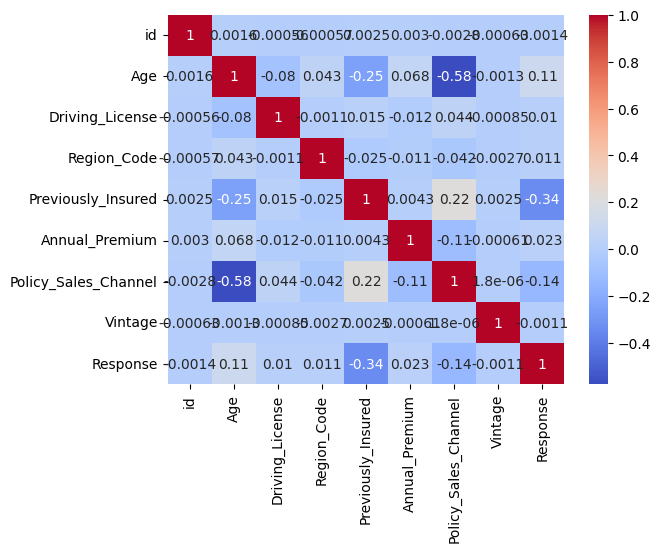

In [143]:
target = 'Response'
numeric_attributes = hi_data.select_dtypes(include=[np.number]).columns.tolist()
attributes = [k for k in numeric_attributes if k != target]

correlations = hi_data[attributes + [target]].corr()[target].drop(target)

print("Correlación entre cada atributo y la variable objetivo (Response):")
print(correlations)
sns.heatmap(hi_data[attributes + [target]].corr(), annot=True, cmap="coolwarm")
plt.show()

Amb el resultat del heatmap decidim eliminar columnes que no veiem que aportin molt a la predicció.

In [144]:
drop_column = ['id','Driving_License','Region_Code','Vintage']
hi_data.drop(drop_column, axis=1, inplace = True)
hi_data

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,Male,44,0,> 2 Years,Yes,40454.0,26.0,1
1,Male,76,0,1-2 Year,No,33536.0,26.0,0
2,Male,47,0,> 2 Years,Yes,38294.0,26.0,1
3,Male,21,1,< 1 Year,No,28619.0,152.0,0
4,Female,29,1,< 1 Year,No,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,Male,74,1,1-2 Year,No,30170.0,26.0,0
381105,Male,30,1,< 1 Year,No,40016.0,152.0,0
381106,Male,21,1,< 1 Year,No,35118.0,160.0,0
381107,Female,68,0,> 2 Years,Yes,44617.0,124.0,0


Per a poder continuar, realitzem la codificació de les variables categòriques, que en aquest cas son Gender, Vehicle_Age i Vehicle_Damage.

In [145]:
hi_data['Gender'] = hi_data['Gender'].map({'Male': 0, 'Female': 1})
print(hi_data[['Gender']].head())
print(hi_data['Gender'].unique())

   Gender
0       0
1       0
2       0
3       0
4       1
[0 1]


In [146]:
hi_data['Vehicle_Age'] = hi_data['Vehicle_Age'].map({'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2})
print(hi_data[['Vehicle_Age']].head())
print(hi_data['Vehicle_Age'].unique())

   Vehicle_Age
0            2
1            1
2            2
3            0
4            0
[2 1 0]


In [147]:
hi_data['Vehicle_Damage'] = hi_data['Vehicle_Damage'].map({'No': 0, 'Yes': 1})
print(hi_data[['Vehicle_Damage']].head())
print(hi_data['Vehicle_Damage'].unique())

   Vehicle_Damage
0               1
1               0
2               1
3               0
4               0
[1 0]


Tornem a mostrar la taula per veure com queda després de les correccions anteriors.

In [148]:
hi_data

,Gender,Age,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
0,0,44,0,2,1,40454.0,26.0,1
1,0,76,0,1,0,33536.0,26.0,0
2,0,47,0,2,1,38294.0,26.0,1
3,0,21,1,0,0,28619.0,152.0,0
4,1,29,1,0,0,27496.0,152.0,0
...,...,...,...,...,...,...,...,...
381104,0,74,1,1,0,30170.0,26.0,0
381105,0,30,1,0,0,40016.0,152.0,0
381106,0,21,1,0,0,35118.0,160.0,0
381107,1,68,0,2,1,44617.0,124.0,0


--------------------

Per poder veure com es troben repartits els valors en els diferents atributs ho visualitzem amb histogrames.

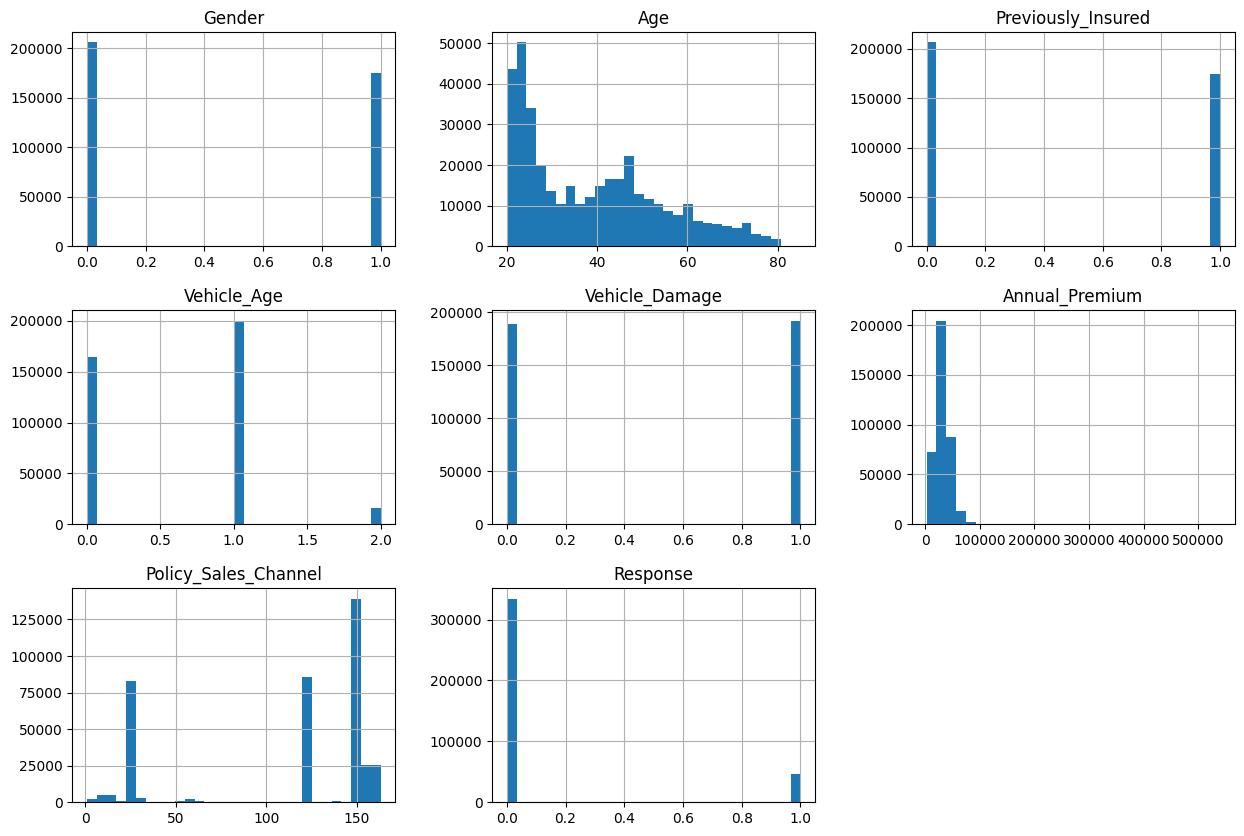

In [149]:
hi_data.hist(bins=30, figsize=(15, 10))
plt.show()

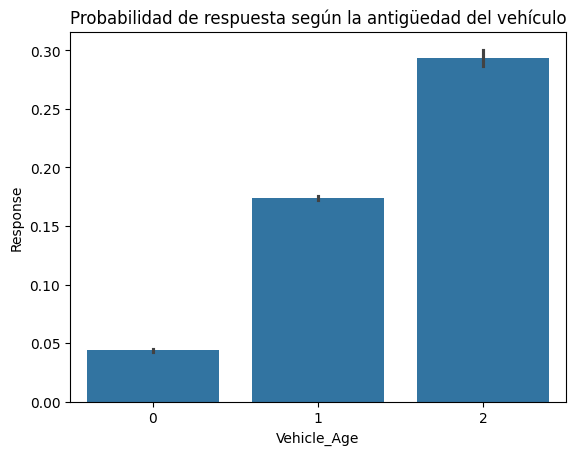

In [150]:
sns.barplot(x="Vehicle_Age", y="Response", data=hi_data)
plt.title("Probabilidad de respuesta según la antigüedad del vehículo")
plt.show()

La mitjana de persones que estan interessades es: 12.256336113815209 %


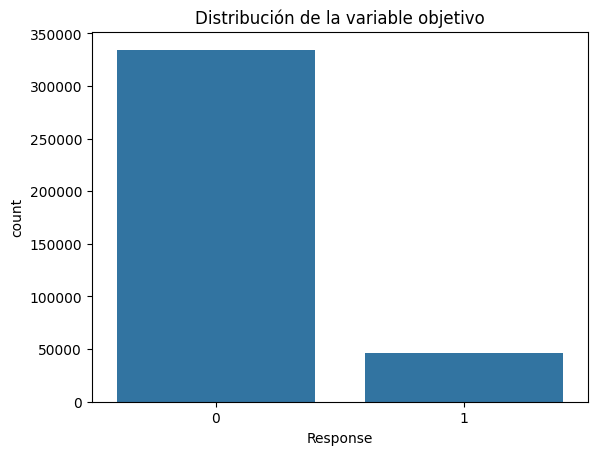

In [151]:
print("La mitjana de persones que estan interessades es:", (hi_data[target].mean())*100, "%")
sns.countplot(x=target, data=hi_data)
plt.title("Distribución de la variable objetivo")
plt.show()

Al veure la gran diferència entre Response de 0 i de 1 decidim fer oversampling per tal de obtenir uns resultats més certers.

In [152]:
from sklearn.model_selection import train_test_split
X = hi_data.drop(columns=['Response'])
y = hi_data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
# pip install imbalanced-learn
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Divisió del conjunt de dades en entrenament i test
X = hi_data.drop(columns=['Response'])
y = hi_data['Response']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar SMOTE al conjunt d'entrenament
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Distribució de classes després d'aplicar SMOTE:")
print(y_train_smote.value_counts())

Distribució de classes després d'aplicar SMOTE:
Response
1    267700
0    267700
Name: count, dtype: int64


Entrenem el model per avaluar-lo amb Regressió Logística utilitzant aquestes dades amb l'oversampling.

In [154]:
from sklearn.linear_model import LogisticRegression

# Entrenar el model amb les dades SMOTE
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# Prediccions al conjunt de test original
y_pred = model.predict(X_test)

# Avaluar el model
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# AUC-ROC per veure el rendiment del model
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC-ROC:", roc_auc_score(y_test, y_pred_prob))

Accuracy: 0.6563459368686206
              precision    recall  f1-score   support

           0       0.99      0.62      0.76     66699
           1       0.26      0.94      0.40      9523

    accuracy                           0.66     76222
   macro avg       0.62      0.78      0.58     76222
weighted avg       0.89      0.66      0.71     76222

AUC-ROC: 0.8139430571069599


Ho comparem amb Regressió Logística sense fer oversampling per observar les diferències que podriem haver obtingut.

In [155]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [156]:
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.87502295925061
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     66699
           1       0.46      0.00      0.00      9523

    accuracy                           0.88     76222
   macro avg       0.67      0.50      0.47     76222
weighted avg       0.82      0.88      0.82     76222



Observem que els resultats varien si fem servir o no oversampling.

Veiem que tenim un problema amb Annual_Premium i per solucionar-ho busquem fer una estandarització de les dades

In [157]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_smote[['Age', 'Annual_Premium', 'Policy_Sales_Channel']] = scaler.fit_transform(
    X_train_smote[['Age', 'Annual_Premium', 'Policy_Sales_Channel']]
)
X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel']] = scaler.transform(
    X_test[['Age', 'Annual_Premium', 'Policy_Sales_Channel']]
)